# Module 5 Week 1
* M5 - W1 Assignment: Churn Problem Part 1

# Demographic information:
- gender: Whether the client is a female or a male (Female, Male).
- SeniorCitizen: Indicates if the customer is 65 or older (0, 1).
- Partner: Whether the client has a partner (married) or not (Yes, No).
- Dependents: Indicates if the customer lives with any dependents (Yes, No). Dependents could be children, parents, grandparents, etc.

# Customer Account Information:
- tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
- Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
- PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

# Services Information:
- PhoneService: Whether the client has a phone service or not (Yes, No).
- MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
- InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber, optic, No)
- OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
- OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
- DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
- TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
- StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
- StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

# Load the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import KFold


In [13]:
df=pd.read_csv(r'C:\Users\User\Desktop\ELU\weekly assignments\module5\week1\WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=';')
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

*****************************

# Clean the Data

In [4]:
# Check for null values in the dataframe
null_values = df.isnull().sum()

#Print the number of null values in each column
print('sum of null values:')
print(null_values)

sum of null values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print('Number of duplicates:',df.duplicated().sum())

Number of duplicates: 0


We remove the CustomerID from our dataset.

In [14]:
# drop customerID from the data set
df.drop(columns="customerID", inplace=True)

Lets Normalize all the values:

In [15]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [16]:
# Extract numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Normalize the numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608,-0.601023
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762,-0.601023
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883,1.663829
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710,-0.601023
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224,1.663829


All the values have been normalized.

*********************************

# Exploratory Data Analysis

## Some general Info about our customers in the dataset:


c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


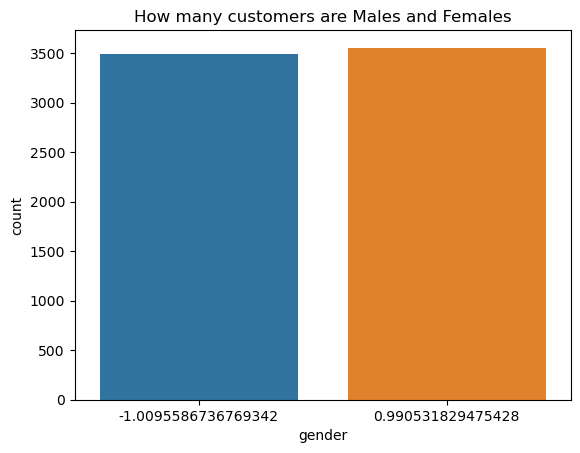

In [79]:
sns.countplot(df["gender"])
plt.title('How many customers are Males and Females')
plt.show()

* It appears that in our database, men and women are approximately equal in number.

Let's take a look at the age range of our customers.

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'How many customers are older than 65 years old/0=No,1=Yes')

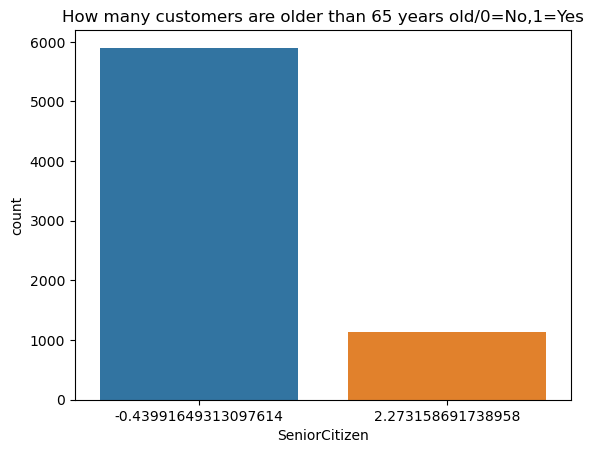

In [80]:
sns.countplot(df['SeniorCitizen'])
plt.title('How many customers are older than 65 years old/0=No,1=Yes')

In [81]:
df['SeniorCitizen'].value_counts()

-0.439916    5901
 2.273159    1142
Name: SeniorCitizen, dtype: int64

* The 16,24% of our customers are older than 65 years old.

Check how many customers live with dependent people(kids,parents,grandparents,etc)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Check if our customers live with dependent people')

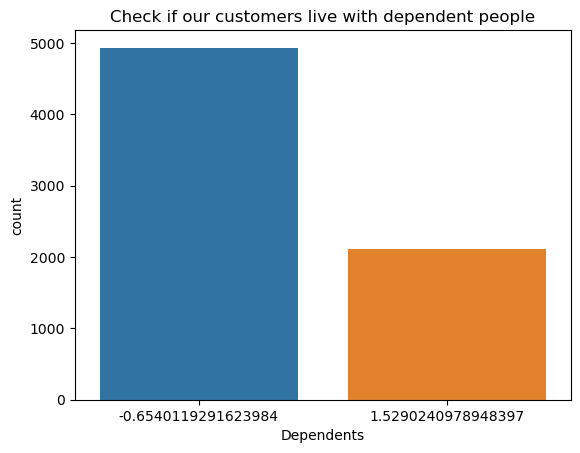

In [82]:
sns.countplot(df['Dependents'])
plt.title('Check if our customers live with dependent people')

In [ ]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

* The 30% of our customers live with dependent people.

Lets check if our customers have multiple telephone lines with the company!

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Check if our customers subscribes to multiple telephone lines with the company')

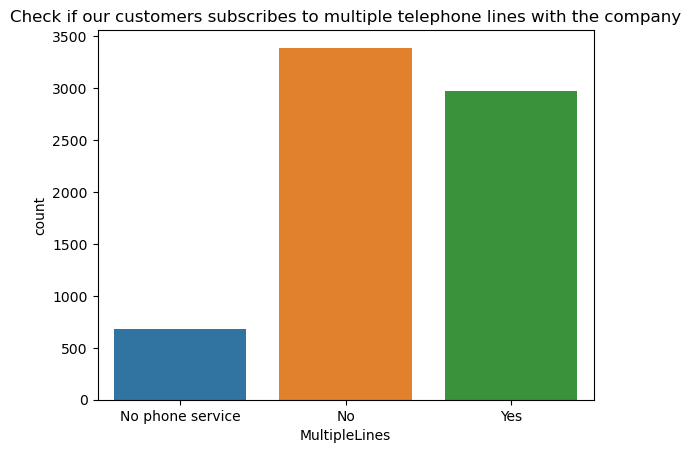

In [11]:
sns.countplot(df['MultipleLines'])
plt.title('Check if our customers subscribes to multiple telephone lines with the company')

In [12]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

* The 42% of our customers have multiple telephone lines with the company, unlike the 48% who do not have multiple telephone lines.There is also a small percentage of 10% who do not have telephone service.

# Some more detailed information:

How many customers have churned and what is the churn rate?

In [13]:
churn = df['Churn'].value_counts()
churn

No     5174
Yes    1869
Name: Churn, dtype: int64

* There are 1869(26,5%)  customers who left within the last month.

Demographic Information:

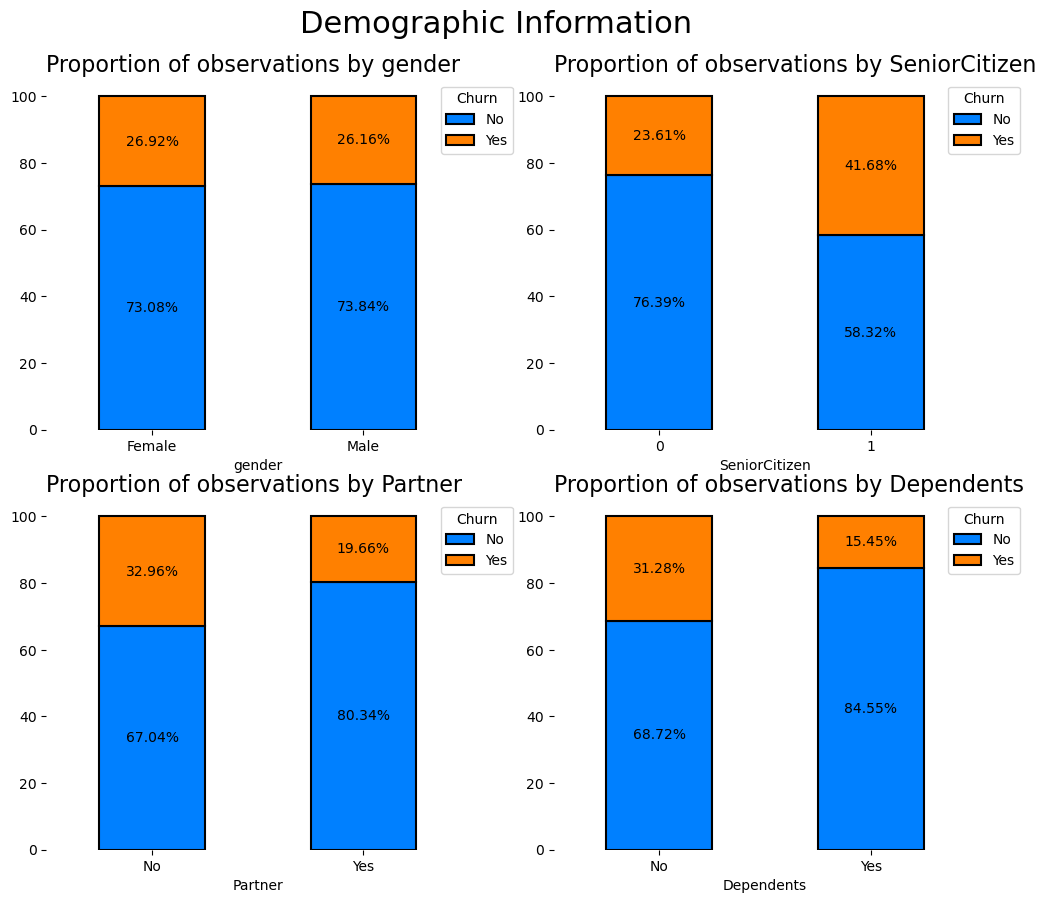

In [16]:
def percentage_stacked_plot(df, columns_to_plot, target_column, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    df: Data frame
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df[target_column]).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 color=['#0080ff', '#ff8000'], edgecolor='black', lw=1.5)
        # add annotations
        for c in ax.containers:
            # set the bar label
            ax.bar_label(c, fmt='%.2f%%',label_type='center')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(df, demographic_columns, "Churn", "Demographic Information")

As shown above, we can draw the following conclusion:
- We do not expect gender to have significant predictive power, because there’s a negligible difference in customer count when changing the service provider. Both genders behave the same when it comes to migrating to another service.
- The churn rate for seniors is almost double that of the younger citizens.
- Customers with partner churn less than customers with no partner.
- Independent customers tends to churn more than dependent ones.

Customer Account Information/Categorical Features:

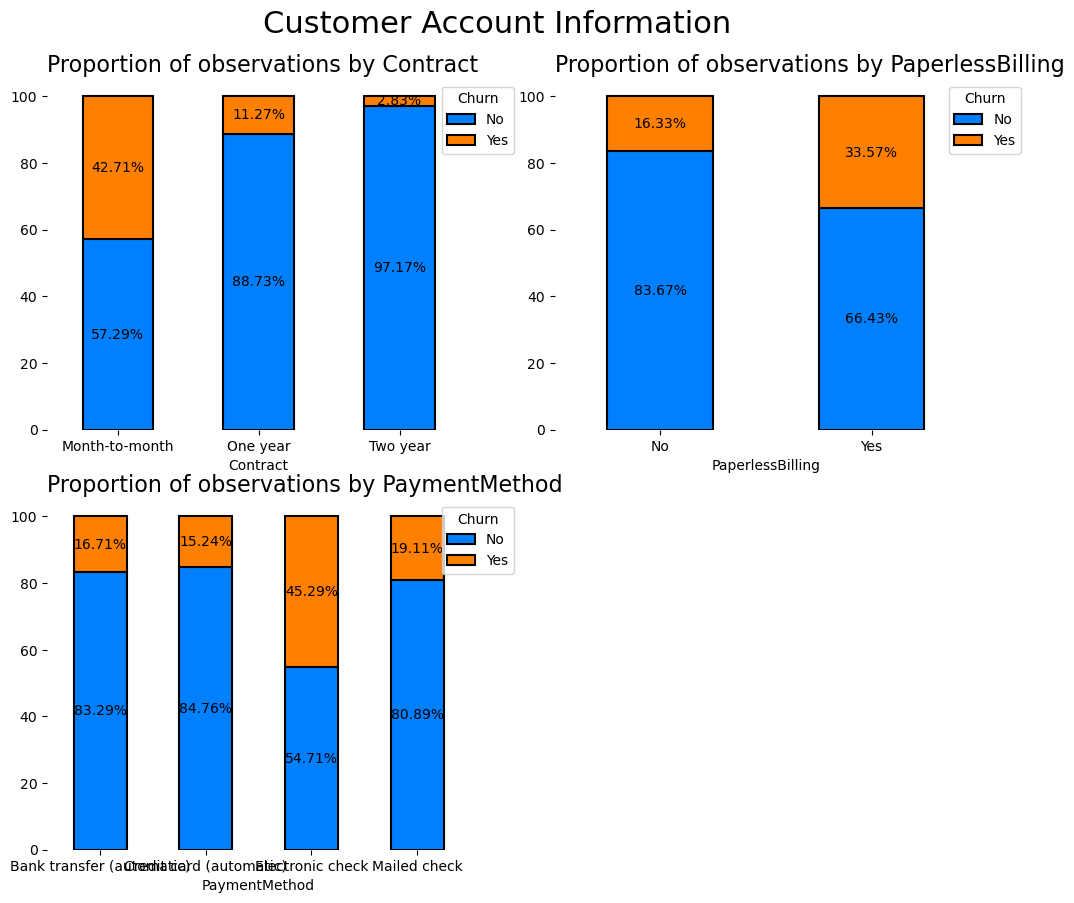

In [19]:
# customer account inforamtion (categorical features) column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(df, account_columns, "Churn", "Customer Account Information")

By analyzing categorical features of the account information, we can extract the following conclusions:
- In terms of contract type, month-to-month contract have the highest churn rates followed by one year and two-year contract.
- Customers subscribed to paperless billing tends to chur, more than those who are not.
- Customers who have opted for an electronic check as a payment method are more likely to leave the company.

Customer Account Information/Numerical features:

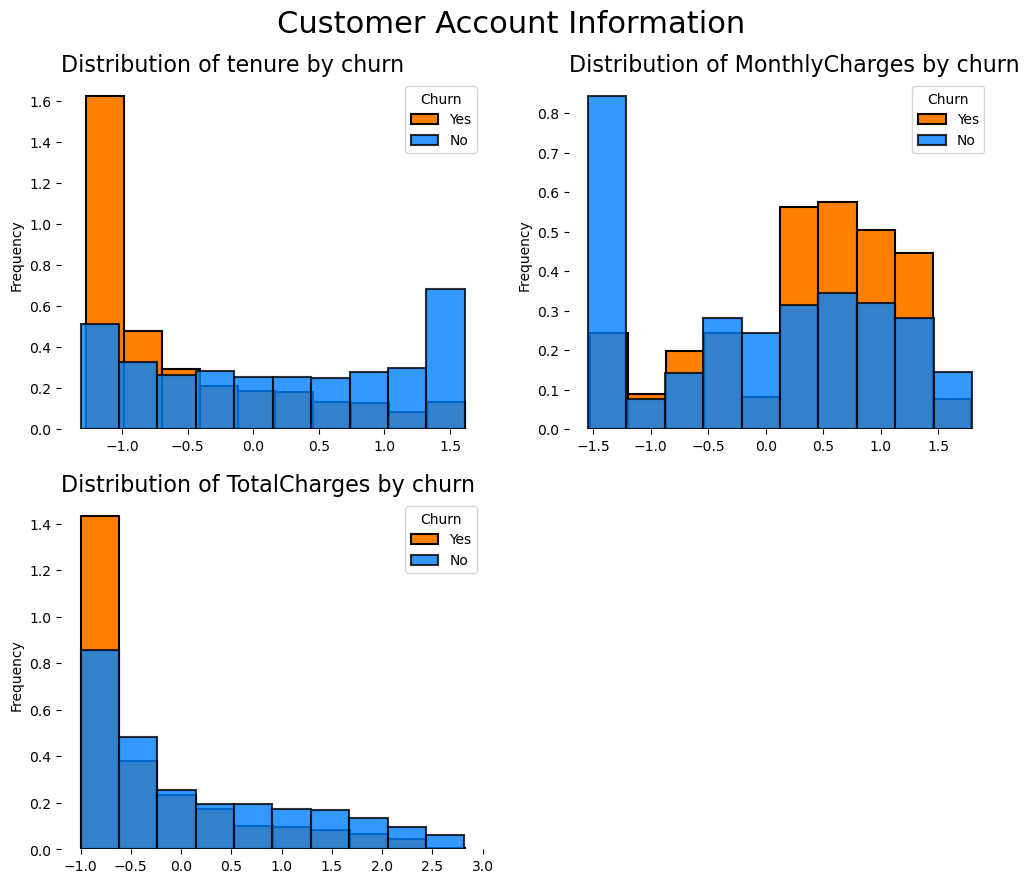

In [48]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
def histogram_plots(df, columns_to_plot, target_column, super_title):
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df.query(f"{target_column} == 'Yes'")[column].plot(kind='hist', ax=ax, density=True, color="#ff8000", label='Yes', alpha=1, edgecolor='black', lw=1.5)
        df.query(f"{target_column} == 'No'")[column].plot(kind='hist', ax=ax, density=True, color="#0080ff", label='No', alpha=0.8, edgecolor='black', lw=1.5)
#       
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(df, account_columns_numeric, "Churn", "Customer Account Information")

From the above historgrams:
- New customers (low tenure) are more likely to unsubscribe.
- The churn rate tends to be high when the monthly fee is high.
- Customers with high total fees are less likely to leave the company.

Services Information:

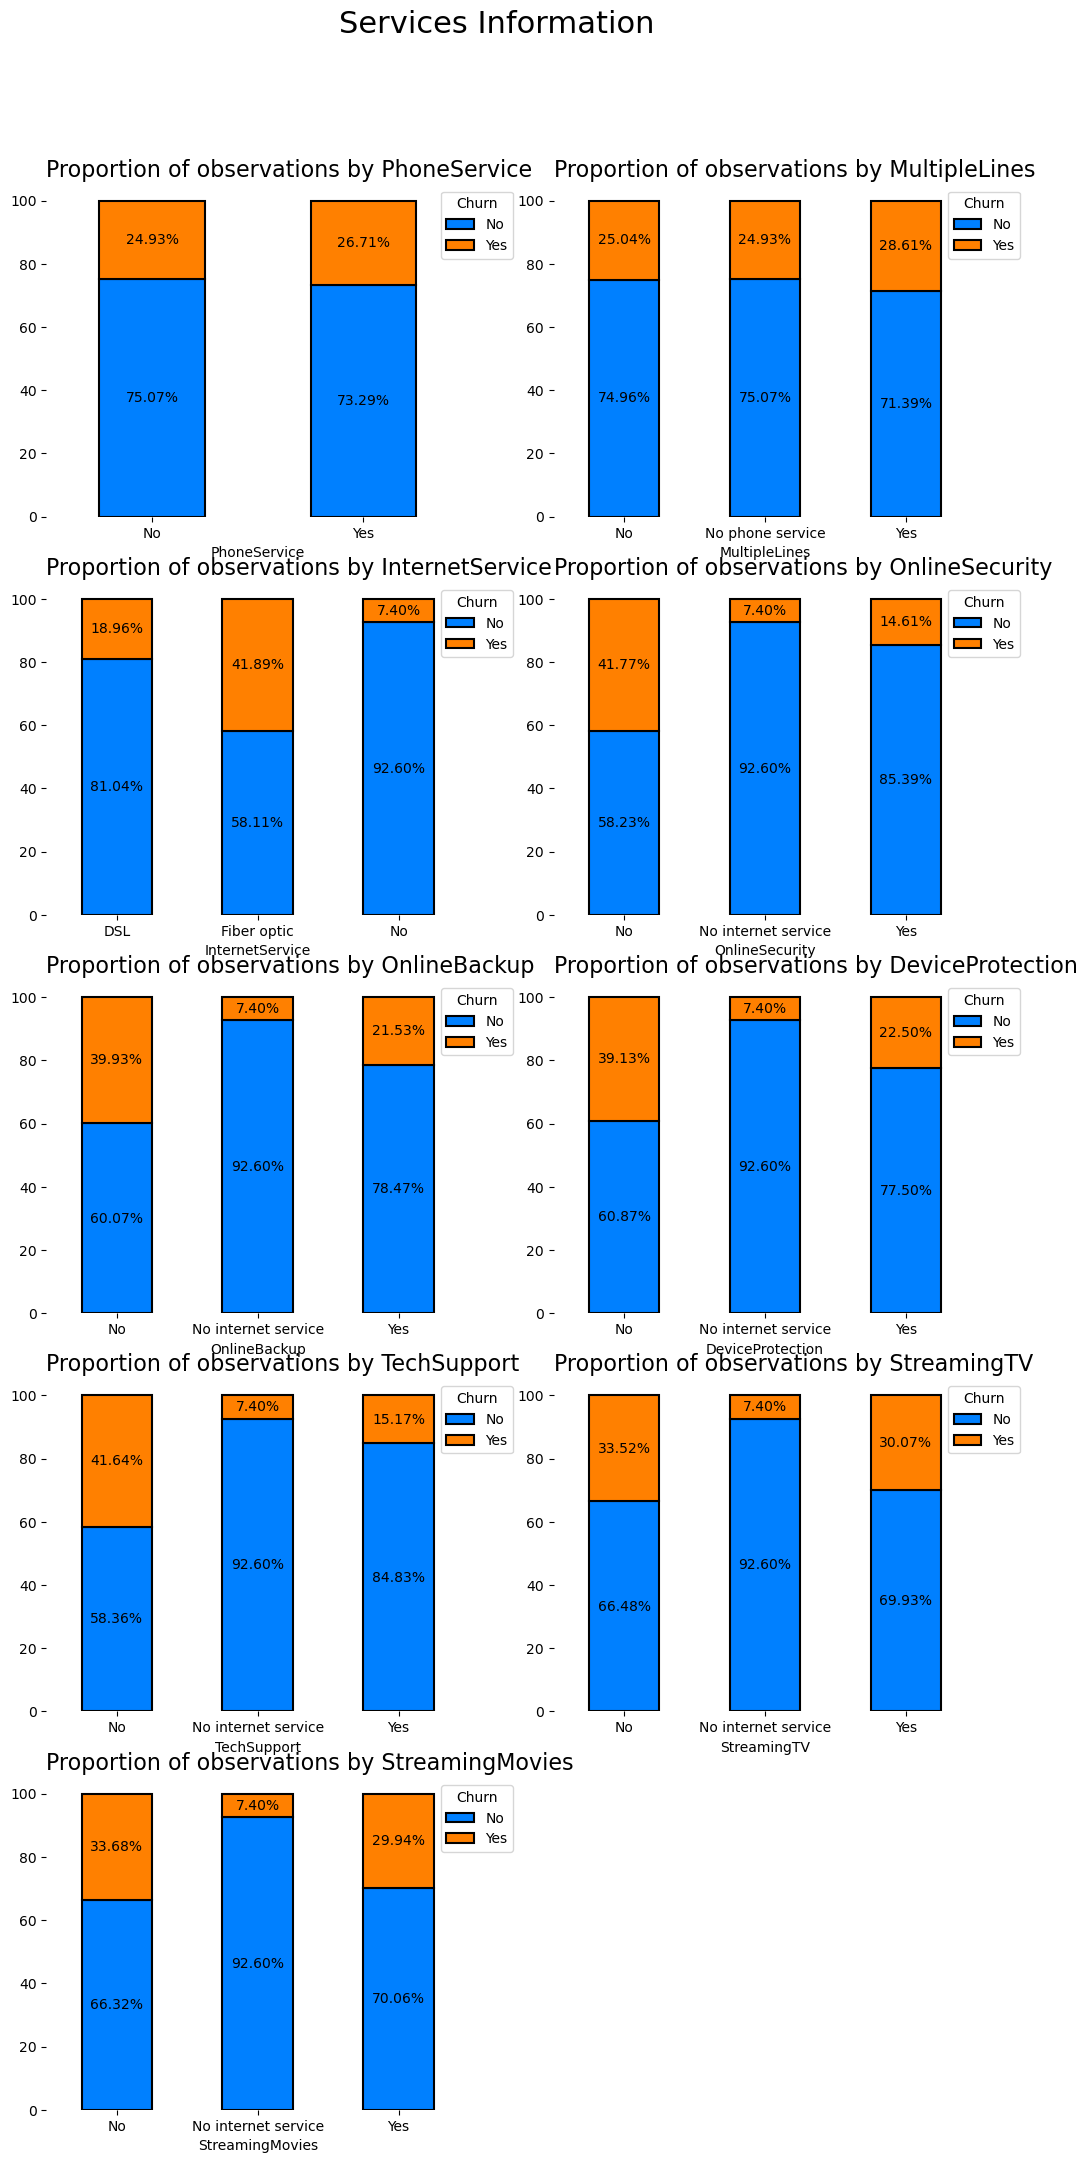

In [28]:

services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(df, services_columns, "Churn", "Services Information")

We can extract the following conclusions about services features:
- We do not expect the phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
- Customers with fiber optic internet service tend to have the highest churn rate.
- Customers with online security unsubscribe less than those without.
- Customers with no tech support tend to churn more often than those with tech support.

********************

# Model:

- I decided to choose the Churn as my target, because it represents the key problem that the company wants to solve: how to predict and prevent customer churn.

In [23]:
y = df['Churn']
X = df.drop('Churn', axis=1)


In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=12)

In [25]:
print(X_test.shape)
print(X_train.shape)

(1409, 19)
(5634, 19)


In [27]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [29]:
{col: coef for col , coef in zip(X_train,linreg.coef_)}

{'gender': -0.0071097460629805445,
 'SeniorCitizen': 0.03860647988899309,
 'Partner': -0.004293915626130755,
 'Dependents': -0.0224590012962744,
 'tenure': -0.2747935180701496,
 'PhoneService': -0.09470318834245572,
 'MultipleLines': 0.023172478480484374,
 'InternetService': 0.09741768202296806,
 'OnlineSecurity': -0.09835567657748873,
 'OnlineBackup': -0.06343875763892237,
 'DeviceProtection': -0.04362995751504786,
 'TechSupport': -0.09395627683220281,
 'StreamingTV': -0.010816239221083731,
 'StreamingMovies': 0.0008023630547902422,
 'Contract': -0.0639773471374705,
 'PaperlessBilling': 0.051306681025481735,
 'PaymentMethod': 0.0111449568371879,
 'MonthlyCharges': 0.29518480383630313,
 'TotalCharges': 0.01025465530319071}

In [30]:
linreg.intercept_

0.0011322162570089806

The small number of the intercept is indicating a low baseline probability of Churn occurring.

# Understanding the limitations of the model:


In [39]:
trainscore= linreg.score(X_train,y_train)
print(trainscore)
print('the score is also the R Squared')

0.2741944688043526
the score is also the R Squared


Just wanted to try manually to prove its the r2_score

In [42]:
predstrain= linreg.predict(X_train)
r2_score(y_train,predstrain)

0.2741944688043526

In [40]:
testscore= linreg.score(X_test,y_test)
print(testscore)
print('the score is also the R Squared')

0.2455570056925921
the score is also the R Squared


The test score is smaller than the train score, which makes sense. Because if the test score was also as high as the train score it would mean that the algorithm does not generalize well.

#  Now lets do a cross validation:

In [49]:
cv=KFold(n_splits=5, shuffle=False)
scores = cross_val_score(linreg, X_train, y_train, scoring='r2', cv=5)
print('The mean of the 5 scores:')
print(np.mean(scores))

The mean of the 5 scores:
0.26711815474941203


In [50]:
cv=KFold(n_splits=5, shuffle=False)
scores = cross_val_score(linreg, X_train, y_train, scoring='r2', cv=5)
print('The 5 scores:')
print(scores)

The 5 scores:
[0.27133965 0.24105214 0.30798699 0.25074476 0.26446723]


# Let's calculate the MSE(Mean Squarred Error) of our model:

In [52]:
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

mape = np.mean(np.abs(y_test - y_pred)/y_test)*100
print(mape)

0.7441311565507311
0.8626303707560563
-44.890464249332


# Regularization with Grid:

In [56]:
grid = {"alpha":np.array([1,0.1,0.01,0.001,0.0001,0,10,100])}

In [57]:
ridge_model = Ridge()
grid = GridSearchCV(estimator = ridge_model, param_grid=grid,scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_score_)

Ridge(alpha=100.0)
-0.7107198552773315


The output displays the best estimator found by the GridSearchCV, which is the Ridge model with an alpha value of 100.0. The second output displays the best score achieved by the model during the cross-validation, which is -0.7107198552773315. This score indicates the mean absolute error of the model on the validation set. A lower score indicates better performance, so this result suggests that the Ridge model with an alpha of 100.0 is the best performing model among the tested hyperparameters.

# Regularization with Lasso:

In [60]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,10,100])

In [61]:
lasso_model = Lasso()
grid = GridSearchCV(estimator=lasso_model,param_grid={'alpha':alphas},scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_score_)

Lasso(alpha=0.001)
-0.7108436771893043


In this case, the best estimator has an alpha value of 0.001 and a mean absolute error score of -0.7108436771893043.

Both Ridge and Lasso models provide similar mean absolute error scores, with Lasso performing slightly worse. However, the difference in scores is very small and both models can be used for regularization of the dataset.

# Now i want to check the Predicted values and the Actual values of the Churn: 

In [65]:
# Predict churn for the test set
y_pred_test = linreg.predict(X_test)

# Create a dataframe of actual churn and predicted churn
df_pred = pd.DataFrame({'Actual Churn': y_test, 'Predicted Churn': y_pred_test})
print(df_pred)


      Actual Churn  Predicted Churn
6235      1.663829         0.186214
3980      1.663829         0.587112
6548     -0.601023        -0.341955
3954     -0.601023         0.934247
5328     -0.601023        -0.640422
...            ...              ...
1975     -0.601023        -0.429832
3164     -0.601023         0.463352
2600     -0.601023         0.682790
3828     -0.601023        -0.965301
5277      1.663829         0.788563

[1409 rows x 2 columns]


*******************************************************

# M5 - W2 Assignment: Churn Problem Part 2

In this assigment i will also keep exploring my data but this time i will use tree-based models.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

- We split the data into training sets:

In [44]:
# Split the data into training and testing sets
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

* # Decision Tree Regressor:

In [45]:
from sklearn.tree import DecisionTreeRegressor

regressor =DecisionTreeRegressor()
regressor.fit(X_train,y_train)
preds=regressor.predict(X_test)
print(mean_squared_error(y_test,preds))

1.4325618934182303


The high mean squarred error in the validation set, indicates that the model is not generalizing well to new data and may be suffering from high variance or overfitting.

In [46]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Cross Validation:

In [54]:
cross_val=KFold(n_splits=3,shuffle=True,random_state=123)

parameter_dico={
    "max_features":[0.5,0.75,1],
    "max_depth":[2,3,5]
}

grid=GridSearchCV(cv=cross_val,estimator=regressor,param_grid=parameter_dico)
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=123, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=8, max_features=10,
                                             min_samples_split=10),
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': [0.5, 0.75, 1]})

In [56]:
grid.best_params_

{'max_depth': 5, 'max_features': 0.75}

In [58]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=0.75, min_samples_split=10)

In [63]:
[(key, value[grid.best_index_]) for key, value in grid.cv_results_.items()]

[('mean_fit_time', 0.007335106531778972),
 ('std_fit_time', 0.00047159513693789695),
 ('mean_score_time', 0.0013337135314941406),
 ('std_score_time', 0.0004718761259665186),
 ('param_max_depth', 5),
 ('param_max_features', 0.75),
 ('params', {'max_depth': 5, 'max_features': 0.75}),
 ('split0_test_score', 0.2804378442877171),
 ('split1_test_score', 0.27083643482287656),
 ('split2_test_score', 0.2548760482047987),
 ('mean_test_score', 0.2687167757717975),
 ('std_test_score', 0.010542645797451795),
 ('rank_test_score', 1)]

In [62]:
# To summarise:
print('Best Score:%s'% grid.best_score_ )
print('Best Hyperparameters: %s' % grid.best_params_)

Best Score:0.2687167757717975
Best Hyperparameters: {'max_depth': 5, 'max_features': 0.75}


* # Random Forest:

In [65]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

preds=regressor.predict(X_test)
print(mean_squared_error(y_test,preds))

0.7438910209469011


In [66]:
[(X,y) for X,y in zip(regressor.feature_names_in_,regressor.feature_importances_)]

[('gender', 0.023415559616209558),
 ('SeniorCitizen', 0.017989218985643367),
 ('Partner', 0.019580274728231113),
 ('Dependents', 0.016259732117972416),
 ('tenure', 0.1284606392322693),
 ('PhoneService', 0.0038480321058489073),
 ('MultipleLines', 0.018409768959698085),
 ('InternetService', 0.0181664847154423),
 ('OnlineSecurity', 0.03893892125112264),
 ('OnlineBackup', 0.018024543926634235),
 ('DeviceProtection', 0.015093174860234109),
 ('TechSupport', 0.020774601640931162),
 ('StreamingTV', 0.011356238866435739),
 ('StreamingMovies', 0.01149647453581591),
 ('Contract', 0.16828510938176228),
 ('PaperlessBilling', 0.02248903736425383),
 ('PaymentMethod', 0.04358450622098023),
 ('MonthlyCharges', 0.21346010837510604),
 ('TotalCharges', 0.1903675731154089)]

The most two influencial features are the Contract and the Tenure. 

i will perform a grid search cross-validation

In [76]:
parameter_dico= {
    'max_depth' : [8,10,20],
    'max_features' : [2,6]
    
}

grid=GridSearchCV(estimator=regressor,param_grid=parameter_dico,cv=cross_val)
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=123, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10, 20], 'max_features': [2, 6]})

In [77]:
# To summarise:
print('Best Score:%s'% grid.best_score_ )
print('Best Hyperparameters: %s' % grid.best_params_)

Best Score:0.3030722417940443
Best Hyperparameters: {'max_depth': 8, 'max_features': 6}


* # Gradient Boosting Regressor:

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

regressor=GradientBoostingRegressor()
regressor.fit(X,y)
preds=regressor.predict(X_test)
print(mean_squared_error(y_test,preds))

0.6287402820437714


Cross-Validation:

In [85]:
cv= KFold(n_splits=5,shuffle=True,random_state=123)

k=1
scores=[]
test_ys=[]
all_preds=[]
for train,test in cv.split(X,y):

    X_train=X.iloc[train]
    X_test=X.iloc[test]
    y_train=y[train]
    y_test=y[test]

    print(f"Training fold {k}...")
    trained_reg=RandomForestRegressor()
    trained_reg.fit(X_train,y_train)

    preds=trained_reg.predict(X_test)
    score=mean_squared_error(y_test,preds)
    k+=1
    scores.append(score)
    test_ys.extend([i for i in y_test])
    all_preds.extend([i for i in preds])


mean_mse=np.mean(scores)
print(f"Mean MSE: {mean_mse}")
print("Out of Sample MSE:", {mean_squared_error(test_ys,all_preds)})

Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
Mean MSE: 0.7440388895410017
Out of Sample MSE: {0.7440444236333906}


The MeanSquarredError of the validation set and the MeanSquarredError out of sample are almost identical, this is very good, which means that the algorithm is robust and  is designed to perform reliably and accurately under a variety of different conditions.

In [84]:
[(X,y) for X,y in zip(regressor.feature_names_in_,regressor.feature_importances_)]

[('gender', 0.00013023129853996835),
 ('SeniorCitizen', 0.010251681959493547),
 ('Partner', 0.00014484096333380363),
 ('Dependents', 0.0018636065993862094),
 ('tenure', 0.19008384785906401),
 ('PhoneService', 0.0007982362988430195),
 ('MultipleLines', 0.010264312759408952),
 ('InternetService', 0.018975865775344786),
 ('OnlineSecurity', 0.08149609801687287),
 ('OnlineBackup', 0.005377009023603942),
 ('DeviceProtection', 0.0011090196022373725),
 ('TechSupport', 0.05919362807165184),
 ('StreamingTV', 0.00309732325111429),
 ('StreamingMovies', 0.005491560921582237),
 ('Contract', 0.40854821508349787),
 ('PaperlessBilling', 0.01776709188995982),
 ('PaymentMethod', 0.018700050736069167),
 ('MonthlyCharges', 0.11521774537322484),
 ('TotalCharges', 0.05148963451677153)]

With this model the feature Contract it looks even more influencial.